# Project 3: Gap Minder

### by Jerry Catron

**For this project we will be working with data from gapminder.com, curated into a .tsv file by Jennifer Bryan. We will be using linear regression to "explore how life expectancy has changed over 50 years across the world."** 

### Setting up Libraries

In [204]:
# Importing Libraries
import wget # To download data from Github to local storage
import os # For accessing file system to set path for data
import pandas as pd # For analyzing our data in a tabular format
import numpy as np # For performing vectorized math operations on our data
from scipy import stats # For fitting linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt # To create visualizations for our data
import seaborn as sns # Library built on top of matplotlib that creates richer visualizations


### Scraping Data

In [141]:
# Downloading data from Jennifer Bryan's GitHub

# Make sure to use the "Raw" file URL
url = 'https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv'

# Setting path to the current folder. Using os module helps ensure proper formatting of path name
path = os.path.join(os.getcwd(), 'gapminder.tsv') 

wget.download(url, path)

'/workspaces/cmsc320/spring2021/project3/gapminder (1).tsv'

### Wrangling Data

In [142]:
data = pd.read_csv("gapminder.tsv", sep='\t') # Parsing the .tsv file into a pandas DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


From the `info()` function we can see that our data consists of 6 variables, and we can see the type of data each variable is stored as. For the variables `country` and `continent` the data type `object` really means String, as they are the names of countries/continents. 

A relieving observation is that every variable has 1704 non-null observations, so it appears that there is no missing data for any of the variables.

Let's use the `head()` function with an argument of `25` to see the first 25 observations in our table.

In [143]:
data.head(25)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


From this it appears that the data from each country was collected in 5-year intervals, starting in 1952 and ending in 2007. So there are a total of 12 observations for every country. 

Some quick math shows us that there are: $\frac{1704}{12} = 142$ countries represented in this data set.

Now that we have some preliminary info on the data we are working with, we an start to explore it further and hopefully uncover some insightful trends.

## Part 1: Regression analysis of Gapminder data

### Exercise 1:
Make a scatter plot of life expectancy across time. 

***


For this exercise I will be using Seaborn's `scatterplot()` function to show the relationship between time in 5 year intervals on the x-axis, and the life expectancy of all the countries involved on the y-axis. For now we will not distinguish between individual countries, as we are trying to gain a macro-level view of how life expectancy changes across all countries/the world. 

In [144]:
sns.set_theme() # Changes default theme from Matplotlib to Seaborn

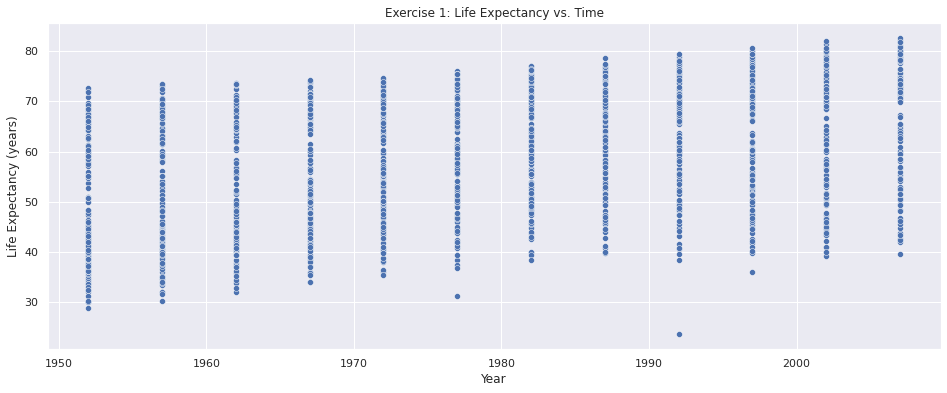

In [145]:
# Matplotlib formatting tweaks
plt.figure(figsize=(16,6)) # Increases size of the plot
plt.title('Exercise 1: Life Expectancy vs. Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')

# Plotting using Seaborn
sns.scatterplot(data=data, x='year', y='lifeExp');

**Side Note**: It appears there are some outliers of low life expectancy in the years 1977, 1992, and 1997. But the outlier in the 1992 data seems to be particularly egregious. Let's investigate. 

In [146]:
data.loc[data.lifeExp == data.lifeExp.min()]

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


So the country of Rwanda had a life expectancy of 23.599 in the year of 1992. This seems medieval, and requires some further investigation to determine if it is a result of poor data collection, or if in fact it is naturally occuring data that we should leave in our data set. 

\* 5 minutes pass \*

Wow, this is terrible. There was a __[Rwandan Civil War](https://en.wikipedia.org/wiki/Rwandan_Civil_War)__ from October 1990 - July 1994 that culminated in the __[Rwandan Genocide](https://en.wikipedia.org/wiki/Rwandan_genocide)__. Reading about it strikes up a distant memory, but knowing the life expectancy of a Rwandan citizen was only 23.599 (same age as me) really drives home the absolute tragedy that occurred. 

For the purposes of our study, this is naturally occuring data, thus we will not remove the point (1992, 23.999).



***
**Question 1**: *Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)*
***

While it appears there is a positive trend between life expectancy and time, I am unable to tell if it is linear from the previous plot. There is no way to see the distribution of the life expectancy for each year. Thus I will create a *violin plot* using Seaborn's `violinplot()` method. That way I can visualize the mean value of life expectancy for each year, and make a more accurate observation on the linearity of life expectancy over time.

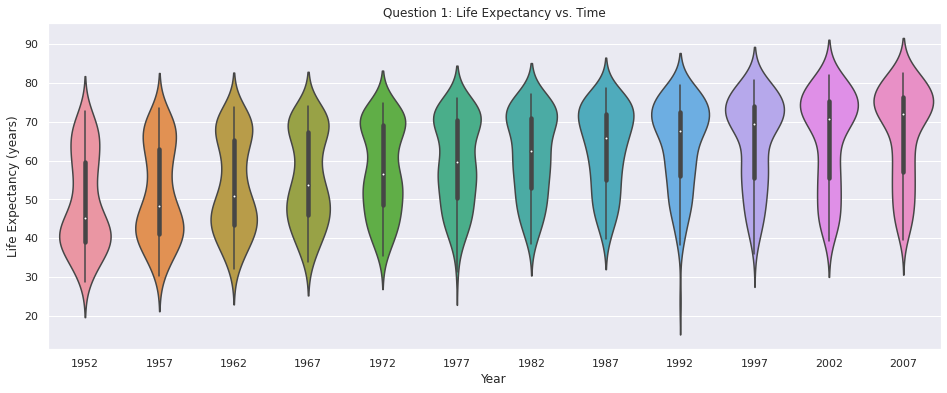

In [189]:
# Matplotlib formatting tweaks
plt.figure(figsize=(16,6)) # Increases size of the plot
plt.title('Question 1: Life Expectancy vs. Time')

# Plotting using Seaborn
sns.violinplot(data=data, x='year', y='lifeExp')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)');

In the plot above the white dots in the center of the "violins" represent the median life expectancy of all countries for that year. It appears that that life expectancy throughout the world and time have a positive linear relationship, although there appears to be a slight inflection point during 1992, and the rate of increase slows from that point on. 

This however is a purely qualitative observation, but we will quantitatively analyze it in the sections to come.

***
**Question 2**: *How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?*
***

When addressing the skewness of these plots I will use the terms positive and negative. A plot has **negative skew** when the median is greater than the mode, and **positive skew** when the median is less than the mode. 

In our violin plots the mode is represented by y-value where the plot is the *widest*. This corresponds to the most frequently occurring life expectancy for that year across all countries.

The tilde character `~` represents an approximation. 
The values I report for the median and mode(s) were approximated visually.



>**1952**: Median ~ 45 | Mode ~ 40
>> Thus the global life expectancy distribution for 1952 is **negatively skewed**. There is another cluster of countries with a life expectancy of ~ 65, so the distribution is **bimodal**. However this mode is not large as the one at ~ 40, thus the distribution is **asymmetrical**.

>**1957**: Median ~ 48 | Mode ~ 42
>> Thus the global life expectancy distribution for 1957 is **negatively skewed**. There is another cluster of countries with a life expectancy of ~ 67, so the distribution is **bimodal**. However this mode is not large as the one at ~ 42, thus the distribution is **asymmetrical**.

>**1962**: Median ~ 51 | Mode ~ 45
>> Thus the global life expectancy distribution for 1962 is **negatively skewed**. There is another cluster of countries with a life expectancy of ~ 68, so the distribution is **bimodal**. However this mode is not large as the one at ~ 45, thus the distribution is **asymmetrical**.

>**1967**: Median ~ 54 | Mode ~ 47
>> Thus the global life expectancy distribution for 1967 is **negatively skewed**. There is another cluster of countries with a life expectancy of ~ 69, so the distribution is **bimodal**. This mode is not large as the one at ~ 47, but it is very close. This is the **most symmetrical** dsitribution out of all the years shown, although it is still not perfectly symmetrical.

>**1972**: Median ~ 56 | Mode ~ 70
>> Thus the global life expectancy distribution for 1972 is **positively skewed**. There is another cluster of countries with a life expectancy of ~ 50, so the distribution is **bimodal**. This mode is not large as the one at ~ 70, but it is very close. So we will say the distributions errs on the side of being **symmetrical**.

>**1977**: Median ~ 60 | Mode ~ 71
>> Thus the global life expectancy distribution for 1977 is **positively skewed**. There is another cluster of countries at ~ 52, but I don't think it's significant. So the distribution is **unimodal**. The distribution is **asymmetrical** since the tail on the negative end is longer than the positive tail.

>**1982**: Median ~ 62 | Mode ~ 72
>> Thus the global life expectancy distribution for 1982 is **positively skewed**. There is only one cluster of countries which is around the mode, so the distribution is **unimodal**. The distribution is **asymmetrical** since the tail on the negative end is longer than the positive tail.

>**1987**: Median ~ 65 | Mode ~ 73
>> Thus the global life expectancy distribution for 1987 is **positively skewed**. There is only one cluster of countries which is around the mode, so the distribution is **unimodal**. The distribution is  **asymmetrical** since the tail on the negative end is longer than the positive tail.

>**1992**: Median ~ 68 | Mode ~ 73
>> Thus the global life expectancy distribution for 1992 is **positively skewed**. There is only one cluster of countries which is around the mode, so the distribution is **unimodal**. The distribution is  **asymmetrical** since the tail on the negative end is longer than the positive tail.

>**1997**: Median ~ 69 | Mode ~ 74
>> Thus the global life expectancy distribution for 1997 is **positively skewed**. There is only one cluster of countries which is around the mode, so the distribution is **unimodal**. The distribution is  **asymmetrical** since the tail on the negative end is longer than the positive tail.

>**2002**: Median ~ 71 | Mode ~ 75
>> Thus the global life expectancy distribution for 2002 is **positively skewed**. There is only one cluster of countries which is around the mode, so the distribution is **unimodal**. The distribution is  **asymmetrical** since the tail on the negative end is longer than the positive tail.

>**2007**: Median ~ 72 | Mode ~ 76
>> Thus the global life expectancy distribution for 2007 is **positively skewed**. There is only one cluster of countries which is around the mode, so the distribution is **unimodal**. The distribution is  **asymmetrical** since the tail on the negative end is longer than the positive tail.


***
**Question 3**: *Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)*
***

If the null hypothesis is that there is no linear relationship between year and life expectancy, I would intuitively guess that we could reject this null hypothesis because the median life expectancy estimation I made in the previous question is monotonically increasing at a rate of ~ (1-3) years per 5-year interval. However, given how much variance there is in each of the distributions, I would not be surprised if our P-value is in (0.05, 0.1]  instead of being in (0, 0.05]. I would be surprised if the P-value is > 0.1. 



***
**Question 4**: *What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)*
***

I expect a violin plot of the residuals from the linear model to show that the residuals for years \[1952, 1977\] to have much more variance than the residuals for years \[1982, 2007\]. My reasoning is that the violin plots above for life expectancy of the years \[1952, 1977\] are bimodal and thus there exists a cluster  points that are further away from the median, so the residuals will be larger for those countries, and cause more variance. 

The violin plots for life expectancy for the years \[1982, 2007\] are unimodal with the mode occuring near the median. So more of the countries will be closer to the line of best fit, and the residuals will not vary as much.

This assumes that the line of best fit will roughly follow the medians. 


***
**Question 5**: *According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?*
***

If we are treating time as a continous variable on our x-axis, then our residual violin plots might suffer from **heteroscedasity**. As mentioned in Question 4, I expect the variance of the residuals to change as the x-axis variable, time, increases. This is called **heteroscedasity** and violates the assumption of **homoscedasticity**. The issue with heteroscedasity is that it makes it much more likely for a regression model to declare that a term in the model is statistically significant, when in fact it is not[$^1$].

$^1$ https://www.statology.org/linear-regression-assumptions/

### Exercise 2: 
Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution, for life expectancy vs. year (as a continuous variable). There is no need to plot anything here, but please print the fitted model out in a readable format.

***

Now we can finally begin to perform a regression analysis on our data. For this part of the project we will be using *linear regression*. Our independent or *explanatory variable* will be **time** measured in years. Our *dependent variable* will be **life expectancy**, also measured in years. We will use the `linregress()` function from our imported `scipy.stats` library to perform this analysis. 

We can use the slope and intercept attributes of our model to form the slope-intercept equation $$Y = \beta_{0}+ \beta_{1}X$$
where $\beta_{1}$ is the slope coefficient  and $\beta_{0}$ is the Y-intercept.
The equation will allow us to plot a *line of best fit* through our scatterplot to show the linear relationship between life expectancy and time across all countries. It also enables us to make predictions of future life expectancy based on an $X$ value greater than 2007.

In [148]:
# Fitting the Model
reg = stats.linregress(data.year.values, data.lifeExp.values)

# Printing out the slope and intercept values
print('Coefficient: ' + str(reg.slope))
print('Intercept: ' + str(reg.intercept))

Coefficient: 0.3259038276371516
Intercept: -585.6521874415444


Thus our fitted linear regression model is: $$ Y_{lifeExp} = -585.65 + 0.33X_{year} $$

***
**Question 6**: *On average, by how much does life expectancy increase every year around the world?*
***

The slope of our model is 0.33. So as the x value (years) increases by 1, the life expectancy across the world increases by 0.33 years, or roughly 4 months. 

***
**Question 7**: *Do you reject the null hypothesis of no relationship between year and life expectancy? Why?*
***

In [149]:
print('P-value: ' + str(reg.pvalue)) # Prints p-value of our regression 

P-value: 7.546794625602333e-80


Becuase our p-value for this regression is $< 0.05$, we can reject the null hypothesis that there is no relationship between year and life expectancy.

### Exercise 3:
Make a violin plot of residuals vs. year for the linear model from Exercise 2.

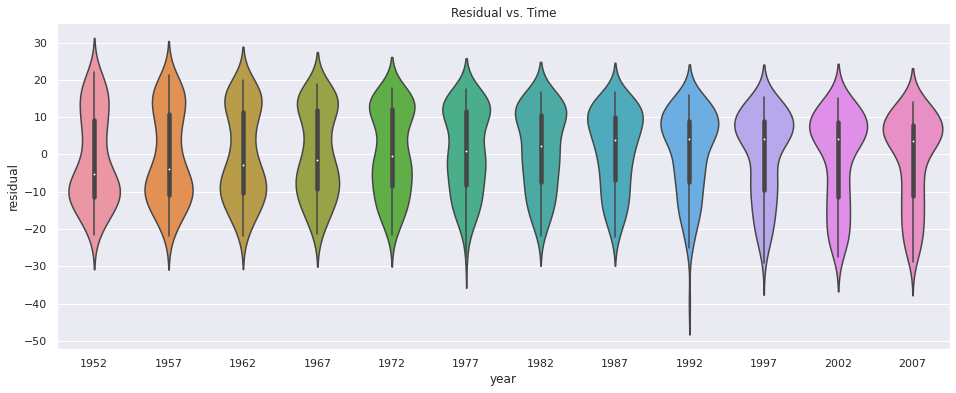

In [210]:
data['regression'] = reg.intercept + data['year']*reg.slope # adding a column to our dataframe that has the calculated mean life expectancy across all countries that year

data['residual'] = (data['lifeExp'] - data['regression'] )

plt.figure(figsize=(16,6))

sns.violinplot(data=data, x='year', y='residual')
plt.title('Residual vs. Time');


***
**Question 8**: *Does the plot of Exercise 3 match your expectations (as you answered Question 4)?*
***

Ignoring the outlier in the later years, yes the plot of Exercise 3 matches my expectations from Question 4. We can see the distributions of residuals have a less variance as the years increase. This can be seen by the width of the violins at higher y-values, as well as the smaller interquartile ranges in the later years. It appears my fears of heteroscedasity might be true.

### Exercise 4: 
Make a boxplot (or violin plot) of model residuals vs. continent.

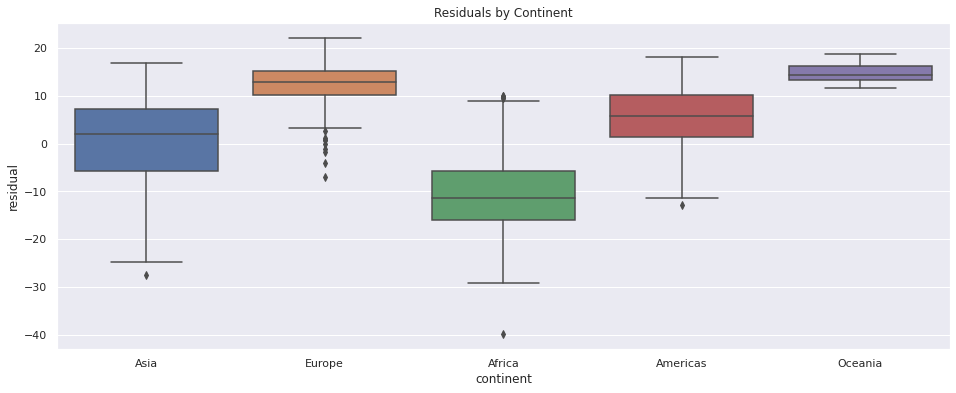

In [211]:
plt.figure(figsize=(16,6))
plt.title('Residuals by Continent')
plt.xlabel('Continent')
sns.boxplot(data=data, x='continent', y='residual');

***
**Question 9**: *Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?*
***

It appears there is a dependence between model residual and continent, which means one of our fundamental assumptions of regression analysis, *independent residuals* is false. Therefore the statistical significance of our linear regression analysis is inaccurate. 

### Exercise 5: 
As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line. The result here can be given as either one scatter plot per continent, each with its own regression line, or a single plot with each continent's points plotted in a different color, and one regression line per continent's points. The former is probably easier to code up.

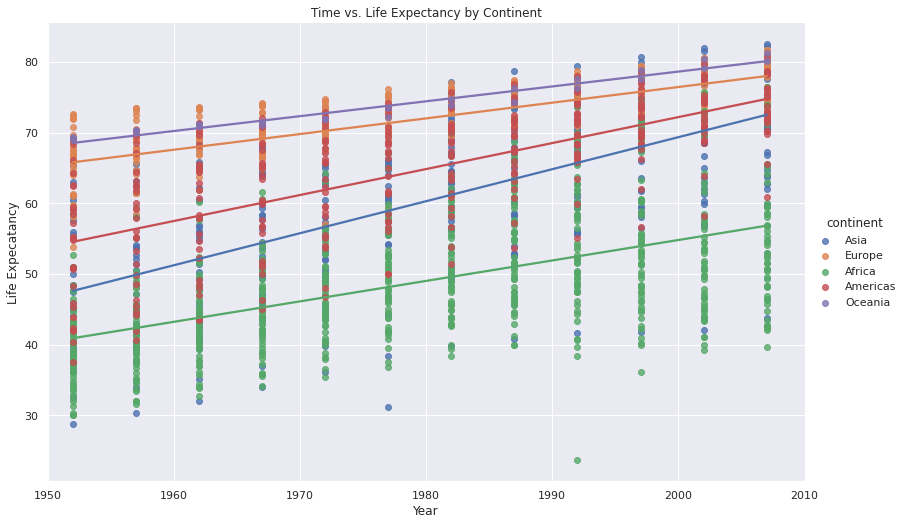

In [185]:
g = sns.lmplot(data=data, x='year', y='lifeExp', hue='continent', fit_reg=True, ci=None, height=7, aspect=1.6)
plt.title(f'Time vs. Life Expectancy by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expecatancy')
plt.xlim(1950, 2010);

***
**Question 10**: *Based on this plot, should your regression model include an interaction term for continent and year? Why?*
***

Based on the plot above, it is evident there is some interaction between life expectancy over time and the continent from which the data was collected. This is seen in the different slopes of the regression lines for the different continents. Thus our regression model needs to include an interaction term for continent and year.

### Exercise 6: 
Fit a linear regression model for life expectancy including a term for an interaction between continent and year. Print out the model in a readable format, e.g., print the coefficients of the model (no need to plot). Hint: adding interaction terms is a form of feature engineering, like we discussed in class (think about, e.g., using (a subset of) polynomial features here).

In [198]:
# Creating Interaction Term
continent = pd.get_dummies(data.continent, drop_first=True, prefix='continent') # dummy variables for contients

standard = data[['year', 'lifeExp']]

combined = pd.concat([standard, continent], axis=1) 

continents = data.continent.values

# forming interaction by multiplying year with continent dummy variable
for c in filter(lambda c: c != 'Africa', continents):
    combined['year*' + c] = combined['continent_'+c]*combined['year']

combined.head()

,year,lifeExp,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,year*Asia,year*Europe,year*Americas,year*Oceania
0,1952,28.801,0,1,0,0,1952,0,0,0
1,1957,30.332,0,1,0,0,1957,0,0,0
2,1962,31.997,0,1,0,0,1962,0,0,0
3,1967,34.020,0,1,0,0,1967,0,0,0
4,1972,36.088,0,1,0,0,1972,0,0,0


In [208]:
X = combined.drop('lifeExp', axis=1).values
y = combined.lifeExp.values

lr = linear_model.LinearRegression()
lr.fit(X, y)

print('Coefficients:')
print(lr.coef_)
print('Intercept:')
print(lr.intercept_)

Coefficients:
[ 2.89529263e-01 -1.38848447e+02 -3.12633049e+02  1.56846852e+02
  1.82349883e+02  1.63593141e-01 -6.75971185e-02  7.81216740e-02
 -7.92568854e-02]
Intercept:
-524.2578460686683


## Exercise 7: 
Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

<AxesSubplot:xlabel='Residual', ylabel='year'>

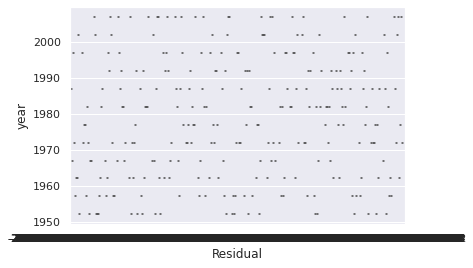

In [212]:
combined['Prediction'] = lr.predict(X)
combined['Residual'] = combined['lifeExp'] - combined['Prediction']




In [ ]:
sns.violinplot(data=combined, x='Residual', y='year');

It appears our residuals are now normally distributed.